<h2>Titanic</h2>

In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

<h3>1. Getting Ready for Data Analyse</h3>

In [3]:
train.shape

(891, 12)

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>2. Looking at Relationships</h3>

In [8]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [9]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


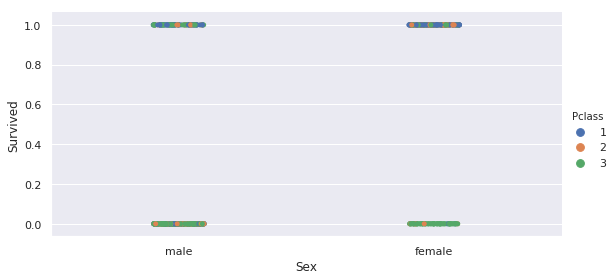

In [13]:
sns.catplot('Sex','Survived', hue='Pclass', height=4, aspect=2, data=train)

<h3>3. Getting Ready to Make Predictions</h3>

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<h4>Step 1: Clean the data</h4>

In [17]:
# Fill all NaNs of 'Fare','Age' with median value
for dataset in [train, test]:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

for dataset in [train, test]:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    print (age_avg)
    age_null_count = dataset['Age'].isnull().sum()
    
    # Generate an array of random numbers as age
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
# Create a new column dividing 'Age' into 5 sectinos
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

29.6991176471
30.2725903614
         AgeBand  Survived
0  (-0.08, 16.0]  0.533333
1   (16.0, 32.0]  0.353982
2   (32.0, 48.0]  0.374016
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [18]:
# Change Age from specific to ranges 1-5
for dataset in [train, test]:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

# Change Sex from string to int
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


<h3>4. Classification</h3>

In [19]:
# All dem modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

<h4> Step 1: Feature Selection </h4>

In [20]:
# Select 'Sex' and 'Pclass' as relevant features of Survival Rate
train_features = ['Survived', 'Pclass', 'Sex']
train_data = train[train_features]

test_features = ['PassengerId', 'Pclass', 'Sex']
test_data = test[test_features]

In [21]:
# Split train_data into two parts
# x_train contains 'Pclass' and 'Sex', y_train contains 'Survived'
x_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# x_test contains 'Pclass' and 'Sex'
x_test = test_data.drop("PassengerId", axis=1).copy()

x_train.shape, y_train.shape, x_test.shape

((891, 2), (891,), (418, 2))

<h4> Step 2: Creating our classifier</h4>

In [22]:
# Check the accuracy using DecisionTreeClassifier for this set of train_data and test_data
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_decision_tree = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)
print (acc_decision_tree)

78.68


In [23]:
# Check the accuracy using LogisticRegression for this set of train_data and test_data
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round( clf.score(x_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

78.68 percent


<h4> Add more Features</h4>

In [24]:
# Add Age
train_features = ['Survived', 'Pclass', 'Sex', 'Age']
train_data = train[train_features]

test_features = ['PassengerId', 'Pclass', 'Sex', 'Age']
test_data = test[test_features]

x_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
x_test = test_data.drop("PassengerId", axis=1).copy()

x_train.shape, y_train.shape, x_test.shape

((891, 3), (891,), (418, 3))

In [25]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_decision_tree = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)
print (acc_decision_tree)

80.13


In [26]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round( clf.score(x_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

78.0 percent


<h3> Submission</h3>

In [34]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred_decision_tree
})

submission.to_csv('./titanic_submission.csv')

In [31]:
submission_survived = submission[submission['Survived'] == 1]
submission_not_survived = submission[submission['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(submission_survived), float(len(submission_survived))/len(submission)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(submission_not_survived), float(len(submission_not_survived))/len(submission)*100.0))
print ("Total: %i"%len(submission))

Survived: 95 (22.7%)
Not Survived: 323 (77.3%)
Total: 418
